# Feature Engineering

In [135]:
import random
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [ ]:
df = sns.load_dataset('titanic')
df

In [ ]:
df.isna().sum().plot(kind="bar")

# Handling missing values

### Drop rows and columns

In [ ]:
df.shape

In [ ]:
# delete the rows or data point to handle missing values

copydf = df.copy()
copydf.dropna().shape

In [ ]:
# drop the values column wise
copydf.dropna(axis=1).shape

## Imputation Techniques

### Replace with mean

In [ ]:
# visualise the distribution of age
sns.histplot(df['age'], kde=True)

In [ ]:
df['age_mean'] = df['age'].fillna(df['age'].mean())
df[['age_mean', "age"]]

'''
Mean imputation works well with normally distributed data
'''

In [ ]:
# Median value imputation
df['age_median'] = df['age'].fillna(df['age'].median())
df[['age_median', 'age']]

'''  
Median Imputation works well with categorical values
'''

In [ ]:
# Mode imputation - works well with Categorical values

# embarked is column which is categorical and has missing values
df[df['embarked'].isnull()] # missing data completely at random (MCAR)

In [ ]:
# check for the types and unique values in the embarked column
df['embarked'].unique()

In [ ]:
# fetch the mode of the column
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]

In [ ]:
# replace the missing values with mode
df['embarked_mode'] = df['embarked'].fillna(mode_value)

In [ ]:
# display the embarked mode and embarked
df[['embarked_mode', 'embarked']]

In [ ]:
# random sampling -- try out yourself

# Handling Imbalanced dataset
1. Upsampling 
2. Downsampling

In [ ]:
# Create a dataframe of two classes with biased data points 

# set a seed for reproducibility (random values won't change with each run)
np.random.seed(123)

# create a dataframe with two classes
n_samples = 1000
class_zero_ratio = 0.9 # 90%
n_class_zero = int(n_samples * class_zero_ratio)
n_class_one = n_samples - n_class_zero

n_class_zero, n_class_one

In [ ]:
# Subsitute values and create a normal distribution in a dataframe

class_zero = pd.DataFrame({
    'feature1': np.random.normal(loc=0, scale=1, size=n_class_zero),
    'feature2': np.random.normal(loc=0, scale=1, size=n_class_zero),
    'target':[0] * n_class_zero 
})

class_one = pd.DataFrame({
    'feature1': np.random.normal(loc=0, scale=1, size=n_class_one),
    'feature2': np.random.normal(loc=0, scale=1, size=n_class_one),
    'target':[1] * n_class_one 
})

In [ ]:
df = pd.concat([class_zero, class_one]).reset_index(drop=True)
df.head()

In [ ]:
df.tail()

In [ ]:
df['target'].value_counts()

In [ ]:
df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]

df_minority.shape

In [ ]:
# resample extrapolates the points, it creates new points with minority and 
# try to utilise with the majority

# first parameter - sample to be umsampled, second parameter replace - 
df_minority_upsampled = resample(df_minority, replace=True, 
         n_samples = len(df_majority), random_state= 42) # sample with replacement


# minority is now upsampled 
df_minority_upsampled.shape


In [ ]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled['target'].value_counts()

Downsampling

In [ ]:
# Create another dataset to demonstrate downsampling

np.random.seed(123)

n_samples = 1000
class_zero_ratio = 0.9 # 90%
n_class_zero = int(n_samples * class_zero_ratio)
n_class_one = n_samples - n_class_zero

n_class_zero, n_class_one

class_zero = pd.DataFrame({
    'feature1': np.random.normal(loc=0, scale=1, size=n_class_zero),
    'feature2': np.random.normal(loc=0, scale=1, size=n_class_zero),
    'target':[0] * n_class_zero 
})

class_one = pd.DataFrame({
    'feature1': np.random.normal(loc=0, scale=1, size=n_class_one),
    'feature2': np.random.normal(loc=0, scale=1, size=n_class_one),
    'target':[1] * n_class_one 
})

df = pd.concat([class_zero, class_one]).reset_index(drop=True)

df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]

In [ ]:
# Downsampling the majority

df_majority_downsampled = resample(df_majority, replace=False, 
         n_samples = len(df_minority), random_state= 42)

df_majority_downsampled.shape

In [ ]:
# concat the dataframes and see the results

df_downsampled = pd.concat([df_minority, df_majority_downsampled])
df_downsampled['target'].value_counts()

## SMOTE (Synthetic Minority Over-Sampling Technique)

popular method for handling imbalanced datasets. It works by generating new, synthetic samples for the minority class, rather than duplicating existing ones. This is achieved by creating new data points at random locations along the line segments between a minority sample and its neighbors. The technique helps prevent overfitting and creates a more robust training set for the minority class, which leads to improved model performance.

In [126]:
# create a dataset from sklearn in-built function
X, y = make_classification(n_samples=1000, n_redundant=0, n_features=2, n_clusters_per_class=1, 
                    weights=[0.90], random_state=12)


In [127]:
# create two data frames, one for the features and other for the target
df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2= pd.DataFrame(y, columns = ['targets'])

# merge features and target
df = pd.concat([df1, df2], axis=1)
df

,f1,f2,targets
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [128]:
# unique value counts
df['targets'].value_counts()

targets
0    900
1    100
Name: count, dtype: int64

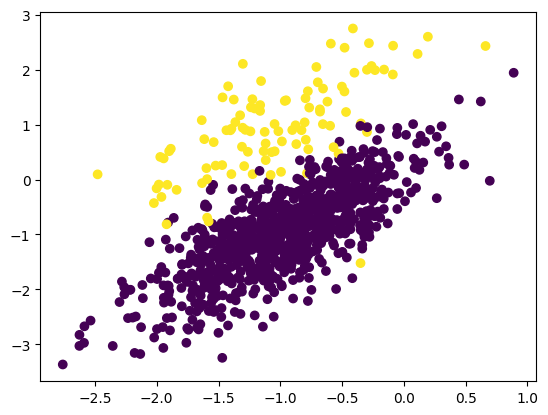

In [129]:
# plot it on a scatter plot
plt.scatter(df['f1'], df['f2'], c=df['targets'])

In [130]:
# oversampling via smote
oversample = SMOTE()
X,y = oversample.fit_resample(df[['f1','f2']], df['targets'])

In [131]:
X.shape, y.shape

((1800, 2), (1800,))

In [132]:
len(y[y==0]), len(y[y==1]) # 900 each, you can verify using the len function

(900, 900)

In [133]:
# concat the oversampled data
df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['targets'])
oversampled = pd.concat([df1, df2], axis = 1)

oversampled

,f1,f2,targets
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
1795,0.059630,2.255884,1
1796,-1.692421,-0.632020,1
1797,-0.282268,1.972533,1
1798,-1.485760,0.259788,1


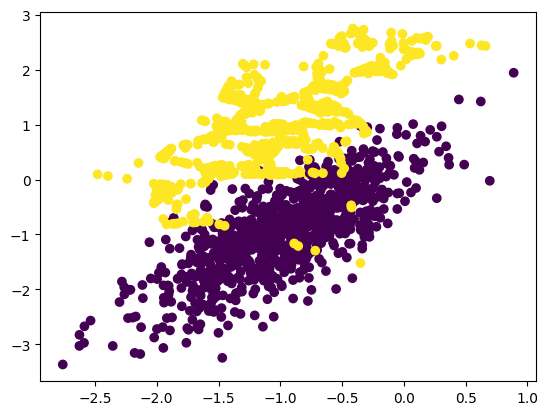

In [134]:
plt.scatter(oversampled['f1'], oversampled['f2'], c=oversampled['targets'])

# Outlier Handling

In [161]:
random.seed(42)
randomo_marks = [random.randint(32, 100) for _ in range(25)]

marks = [46, 35, 67, 63, 60, 49, 45, 43, 86, 36, 35, 43, 59, 61, 
         96, 35, 57, 85, 60, 89, 67, 32, 52, 86, 75, 1120, 1130, 1560, 1200]

print(marks)
# generate min, max, q1, q2, q3 

minimum, q1, median, q3, maximum = np.quantile(marks, [0, 0.25, 0.5, 0.75, 1.0])

[46, 35, 67, 63, 60, 49, 45, 43, 86, 36, 35, 43, 59, 61, 96, 35, 57, 85, 60, 89, 67, 32, 52, 86, 75, 1120, 1130, 1560, 1200]


In [162]:
minimum, q1, median, q3, maximum

(np.float64(32.0),
 np.float64(45.0),
 np.float64(60.0),
 np.float64(86.0),
 np.float64(1560.0))

In [163]:
# calculate IQR, lower bound and upper bound

IQR = q3 - q1

lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

lower_bound, upper_bound

(np.float64(-16.5), np.float64(147.5))

<Axes: >

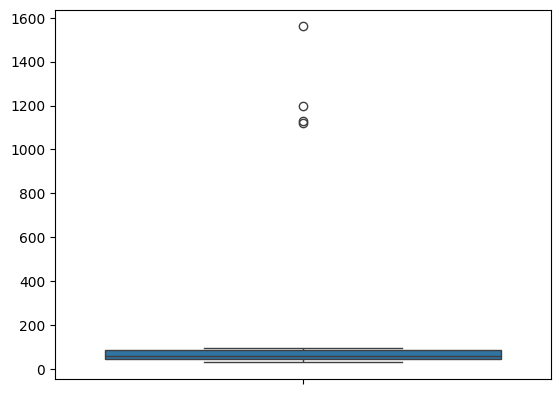

In [164]:
sns.boxplot(marks)